<a href="https://colab.research.google.com/github/qu-bit1/symbolic-equation-of-a-neural-net/blob/master/symbolic_representation_of_neural_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 3: Build Symbolic Equation from Neural Network Output**

*Submitted by:*

*Sagar Arora*(*220933*)

This notebook consists of my majority of thought process (of course the relevant ones) while doing this task.

### **How to run the notebook**:
- Can run on CPU too.
- Either press run all and go down the cell where you are prompted to enter an input of your choice.
- Run each cell one by one till you reach the cell where you are prompted to enter an input of your choice.

## **Defining and training the neural network**

Importing necessary libraries majorly numpy, tf, sklearn and sympy

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
import tensorflow as tf
import sympy as sp

Training on the Iris dataset.

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

Therefore 4 possible input variables.

In [ ]:
# Loading the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

I trained on a 2-hidden layer feedforward neural network with 6 neurons in both hidden layers with a total of 93 trainable parameters

Following is the schematic of my neural network (drawn on excalidraw)

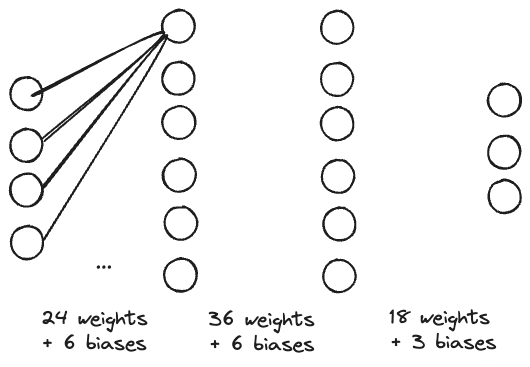

In [ ]:
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(4,)),
    tf.keras.layers.Dense(6, activation='relu', kernel_initializer='random_normal'),
    tf.keras.layers.Dense(6, activation='relu', kernel_initializer='random_normal'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 6)                 30        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 3)                 21        
                                                                 
Total params: 93 (372.00 Byte)
Trainable params: 93 (372.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X, y, epochs=200, batch_size=32)

Epoch 1/200
5/5 [==============================] - 1s 4ms/step - loss: 1.0980 - accuracy: 0.4333
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 1.0969 - accuracy: 0.3600
Epoch 3/200
5/5 [==============================] - 0s 4ms/step - loss: 1.0965 - accuracy: 0.3533
Epoch 4/200
5/5 [==============================] - 0s 3ms/step - loss: 1.0964 - accuracy: 0.3333
Epoch 5/200
5/5 [==============================] - 0s 2ms/step - loss: 1.0960 - accuracy: 0.3333
Epoch 6/200
5/5 [==============================] - 0s 2ms/step - loss: 1.0958 - accuracy: 0.3467
Epoch 7/200
5/5 [==============================] - 0s 2ms/step - loss: 1.0956 - accuracy: 0.3600
Epoch 8/200
5/5 [==============================] - 0s 2ms/step - loss: 1.0952 - accuracy: 0.3600
Epoch 9/200
5/5 [==============================] - 0s 2ms/step - loss: 1.0949 - accuracy: 0.3467
Epoch 10/200
5/5 [==============================] - 0s 3ms/step - loss: 1.0946 - accuracy: 0.3533
Epoch 11/200
5/5 [===========

In [ ]:
model.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# testing the model

input_data = [5.5, 3.8, 1.7, 0.4]
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction_probabilities = model.predict(input_data_reshaped)

predicted_class_index = np.argmax(prediction_probabilities)

if predicted_class_index == 0:
    print("Predicted class: setosa")
elif predicted_class_index == 1:
    print("Predicted class: versicolor")
elif predicted_class_index == 2:
    print("Predicted class: virginica")

1/1 [==============================] - 0s 125ms/step
Predicted class: setosa


## **Exploring the parameters of the network**

In [ ]:
# weights and biases between input and 1st hidden layer
model.layers[1].get_weights()

[array([[-0.0392388 , -0.03945966,  0.0373222 ,  0.22560251,  0.06488997,
          0.01979341],
        [-0.03339946, -0.0142856 , -0.01222465,  0.25763494,  0.01669244,
         -0.02003668],
        [-0.03395408, -0.0438095 ,  0.4814633 , -0.23863757,  0.4384766 ,
         -0.12280047],
        [ 0.00981111,  0.02423311,  0.70935667, -0.5380099 ,  0.60929835,
          0.02216373]], dtype=float32),
 array([ 0.        ,  0.        , -0.19145758,  0.36545086, -0.1568684 ,
         0.        ], dtype=float32)]

In [ ]:
# weights and biases between 1st and 2nd hidden layer
model.layers[2].get_weights()

[array([[ 0.01558522, -0.08915482,  0.04402914,  0.00135766, -0.00896062,
          0.01829775],
        [-0.09426739,  0.00999466,  0.03378607, -0.02205719,  0.01856203,
         -0.02601918],
        [-0.09134047, -0.03646337, -0.01757221, -0.03630325, -0.04119295,
          0.46405143],
        [ 0.02677008, -0.04024647,  0.00597418, -0.09796111,  0.05201013,
         -1.0875523 ],
        [-0.09396843, -0.07093579, -0.01255743,  0.0162311 , -0.11023263,
          0.40531498],
        [-0.05888029,  0.06673779,  0.06025617,  0.06524397,  0.09662601,
         -0.09679871]], dtype=float32),
 array([ 0.        ,  0.        ,  0.        , -0.00885382, -0.02539089,
        -0.10390843], dtype=float32)]

In [ ]:
# weights and biases between 2nd and 3rd hidden layer
model.layers[3].get_weights()

[array([[ 0.62302625,  0.52936697, -0.1567893 ],
        [ 0.32470202,  0.640537  ,  0.32955635],
        [-0.12751138,  0.7545353 ,  0.73499405],
        [-0.08806525, -0.3569599 , -0.3887436 ],
        [-0.62424815,  0.57807285, -0.73462856],
        [-1.2868598 ,  0.19879529,  0.8453331 ]], dtype=float32),
 array([ 0.82192326,  0.22682633, -0.85470474], dtype=float32)]

In [ ]:
model.layers[3].get_weights()[1]

array([ 0.82192326,  0.22682633, -0.85470474], dtype=float32)

Can make an array of all the weights as follows too

In [ ]:
params = model.get_weights()

In [ ]:
params

[array([[-0.0392388 , -0.03945966,  0.0373222 ,  0.22560251,  0.06488997,
          0.01979341],
        [-0.03339946, -0.0142856 , -0.01222465,  0.25763494,  0.01669244,
         -0.02003668],
        [-0.03395408, -0.0438095 ,  0.4814633 , -0.23863757,  0.4384766 ,
         -0.12280047],
        [ 0.00981111,  0.02423311,  0.70935667, -0.5380099 ,  0.60929835,
          0.02216373]], dtype=float32),
 array([ 0.        ,  0.        , -0.19145758,  0.36545086, -0.1568684 ,
         0.        ], dtype=float32),
 array([[ 0.01558522, -0.08915482,  0.04402914,  0.00135766, -0.00896062,
          0.01829775],
        [-0.09426739,  0.00999466,  0.03378607, -0.02205719,  0.01856203,
         -0.02601918],
        [-0.09134047, -0.03646337, -0.01757221, -0.03630325, -0.04119295,
          0.46405143],
        [ 0.02677008, -0.04024647,  0.00597418, -0.09796111,  0.05201013,
         -1.0875523 ],
        [-0.09396843, -0.07093579, -0.01255743,  0.0162311 , -0.11023263,
          0.40531498],

Creating an `all_weights` & `all_biases` list for easier access in future.
example `all_weights[0]` will have weights for all the connection b/w input and 1st hidden layer

In [ ]:
all_weights = []
all_biases = []
for i in range(0,6):
  if (i%2 == 0):
    all_weights.append(params[i])
  else:
    all_biases.append(params[i])

In [ ]:
all_weights

[array([[-0.0392388 , -0.03945966,  0.0373222 ,  0.22560251,  0.06488997,
          0.01979341],
        [-0.03339946, -0.0142856 , -0.01222465,  0.25763494,  0.01669244,
         -0.02003668],
        [-0.03395408, -0.0438095 ,  0.4814633 , -0.23863757,  0.4384766 ,
         -0.12280047],
        [ 0.00981111,  0.02423311,  0.70935667, -0.5380099 ,  0.60929835,
          0.02216373]], dtype=float32),
 array([[ 0.01558522, -0.08915482,  0.04402914,  0.00135766, -0.00896062,
          0.01829775],
        [-0.09426739,  0.00999466,  0.03378607, -0.02205719,  0.01856203,
         -0.02601918],
        [-0.09134047, -0.03646337, -0.01757221, -0.03630325, -0.04119295,
          0.46405143],
        [ 0.02677008, -0.04024647,  0.00597418, -0.09796111,  0.05201013,
         -1.0875523 ],
        [-0.09396843, -0.07093579, -0.01255743,  0.0162311 , -0.11023263,
          0.40531498],
        [-0.05888029,  0.06673779,  0.06025617,  0.06524397,  0.09662601,
         -0.09679871]], dtype=float3

In [ ]:
all_biases

[array([ 0.        ,  0.        , -0.19145758,  0.36545086, -0.1568684 ,
         0.        ], dtype=float32),
 array([ 0.        ,  0.        ,  0.        , -0.00885382, -0.02539089,
        -0.10390843], dtype=float32),
 array([ 0.82192326,  0.22682633, -0.85470474], dtype=float32)]

 ## **Representing Sympy matrices for the output layer**
Representing the symbolic expression in a simplified manner.

In [ ]:
w = sp.Matrix(all_weights[2])

Weights matrix b/w 2nd hidden layer and output layer, here each column represents weights from previous layer's 6 neurons for each output neuron

In [ ]:
w

Matrix([
[  0.623026, 0.529367, -0.156789],
[  0.324702, 0.640537,  0.329556],
[ -0.127511, 0.754535,  0.734994],
[-0.0880653, -0.35696, -0.388744],
[ -0.624248, 0.578073, -0.734629],
[  -1.28686, 0.198795,  0.845333]])

**Neuron values of 2nd hidden layer**, represented by $x_{2i}$ which can be further opened i.e can be written in the format of previous layer's neuron values which can be further written in terms of input values.

For the sake of simplicity I would here be representing the symbolic expression in the terms of $x_{2i}$ only.

In the next section you'll have the option to see the full expression with input features as the only variables

In [ ]:
hidden_out = sp.Matrix([sp.symbols(f'x2_{i+1}') for i in range(6)])

In [ ]:
hidden_out

Matrix([
[x2_1],
[x2_2],
[x2_3],
[x2_4],
[x2_5],
[x2_6]])

Biases matrix for each neuron in the output layer

In [ ]:
b = sp.Matrix(all_biases[2])

In [ ]:
b

Matrix([
[ 0.821923],
[ 0.226826],
[-0.854705]])

In [ ]:
sp.Matrix(w.T * hidden_out)

Matrix([
[ 0.623026*x2_1 + 0.324702*x2_2 - 0.127511*x2_3 - 0.0880653*x2_4 - 0.624248*x2_5 - 1.28686*x2_6],
[  0.529367*x2_1 + 0.640537*x2_2 + 0.754535*x2_3 - 0.35696*x2_4 + 0.578073*x2_5 + 0.198795*x2_6],
[-0.156789*x2_1 + 0.329556*x2_2 + 0.734994*x2_3 - 0.388744*x2_4 - 0.734629*x2_5 + 0.845333*x2_6]])

Final symbolic representation of output layer will be after applying softmax activation function to the `pre_final`

In [ ]:
pre_final = sp.Matrix(w.T * hidden_out + b)

In [ ]:
pre_final

Matrix([
[ 0.623026*x2_1 + 0.324702*x2_2 - 0.127511*x2_3 - 0.0880653*x2_4 - 0.624248*x2_5 - 1.28686*x2_6 + 0.821923],
[  0.529367*x2_1 + 0.640537*x2_2 + 0.754535*x2_3 - 0.35696*x2_4 + 0.578073*x2_5 + 0.198795*x2_6 + 0.226826],
[-0.156789*x2_1 + 0.329556*x2_2 + 0.734994*x2_3 - 0.388744*x2_4 - 0.734629*x2_5 + 0.845333*x2_6 - 0.854705]])

## **Writing the math equation with input features as variables**

Plan:
- Using `all_weights[0]` and `all_biases[0]` get values of neurons in hidden layer 1 after applying `relu` activation as defined in the model architecture
- Then similarly using those neuron values as inputs compute values of neurons of hidden layer 2 and then finally get the output_layer after using `softmax` classifier to get final prediction.

**Important info about the function below**
- You'll have the option to view the the symbolic representation and the prediction made by taking the symbolic expression from the output layer as input.
- To view the expression input 1 when prompted and to view the prediction input 2 when prompted.

In [ ]:
def symbolic_eq_gen(input_values=None):

  '''
  This function gives the symbolic representation or the prediction according to your choice
  '''

  x_symbols = sp.symbols("x0:4")  # Creates x0, x1, x2, x3 as symbols
  x = sp.Matrix(x_symbols)

  # if input_values is None:
  user_choice = int(input("Enter 1 to get the symbolic representation, or 2 to predict the flower class using that symbolic expression: "))
  if user_choice == 2:
      input_values = input("Enter 4 comma-separated values for x0, x1, x2, x3, (default values : 5.5, 3.8, 1.7, 0.4): ")
      # if empty input give x some default value
      if input_values.strip() == "":
        input_values = "5.5, 3.8, 1.7, 0.4"
      print(f"Input values are : {input_values}")

  # Parse input values as a list of floats
  if input_values:
      input_values = [float(val) for val in input_values.split(',')]
      # If input values are provided, substitute them into the symbol matrix
      if len(input_values) == 4:
          x = x.subs({x_symbols[i]: input_values[i] for i in range(4)})

  #Getting the params values from the lists created earlier and putting them in a sympy matrix
  w0 = sp.Matrix(all_weights[0])
  b0 = sp.Matrix(all_biases[0])
  w1 = sp.Matrix(all_weights[1])
  b1 = sp.Matrix(all_biases[1])
  w2 = sp.Matrix(all_weights[2])
  b2 = sp.Matrix(all_biases[2])

  # Calculating a1, h1, a2, h2, a3 using sympy operations
  a1 = w0.T * x + b0
  h1 = sp.Matrix([sp.Max(element, 0) for element in a1]) # RelU activation
  a2 = w1.T * h1 + b1
  h2 = sp.Matrix([sp.Max(element, 0) for element in a2]) # RelU activation
  a3 = w2.T * h2 + b2

  # Softmax activation to get probability
  softmax_denominator = sp.Add(*a3.applyfunc(sp.exp))
  h3 = a3.applyfunc(lambda val: sp.exp(val) / softmax_denominator)

  return user_choice, h3

In [ ]:
# Get the equation in this cell:

user_choice, result_h3 = symbolic_eq_gen()
print("--------------------------------------------------------------------------------------------------")
if (user_choice == 2):
  h_values = [result_h3[0],result_h3[1], result_h3[2]]
  flower_class = ['Setosa', 'Versicolor', 'Virginica']
  max_idx = np.argmax(h_values)
  print(f"The values of output layer after softmax activation are -> {result_h3}")
  print(f"Implying the flower class is {flower_class[max_idx]}")
else:
  print("The symbolic representation of the output layer in terms of input variables(i.e x0,x1,x2,x3) is:")
  print(result_h3)


Enter 1 to get the symbolic representation, or 2 to predict the flower class using that symbolic expression: 1
--------------------------------------------------------------------------------------------------
The symbolic representation of the output layer in terms of input variables(i.e x0,x1,x2,x3) is:
Matrix([[2.27487*exp(0.623026*Max(0, -0.0942674*Max(0, -0.0394597*x0 - 0.0142856*x1 - 0.0438095*x2 + 0.0242331*x3) + 0.0155852*Max(0, -0.0392388*x0 - 0.0333995*x1 - 0.0339541*x2 + 0.00981111*x3) - 0.0588803*Max(0, 0.0197934*x0 - 0.0200367*x1 - 0.1228*x2 + 0.0221637*x3) - 0.0913405*Max(0, 0.0373222*x0 - 0.0122247*x1 + 0.481463*x2 + 0.709357*x3 - 0.191458) - 0.0939684*Max(0, 0.06489*x0 + 0.0166924*x1 + 0.438477*x2 + 0.609298*x3 - 0.156868) + 0.0267701*Max(0, 0.225603*x0 + 0.257635*x1 - 0.238638*x2 - 0.53801*x3 + 0.365451)) + 0.324702*Max(0, 0.00999466*Max(0, -0.0394597*x0 - 0.0142856*x1 - 0.0438095*x2 + 0.0242331*x3) - 0.0891548*Max(0, -0.0392388*x0 - 0.0333995*x1 - 0.0339541*x2 + 0.009

In [ ]:
# Get the the prediction in this cell:

user_choice, result_h3 = symbolic_eq_gen()
print("--------------------------------------------------------------------------------------------------")
if (user_choice == 2):
  h_values = [result_h3[0],result_h3[1], result_h3[2]]
  flower_class = ['Setosa', 'Versicolor', 'Virginica']
  max_idx = np.argmax(h_values)
  print(f"The values of output layer after softmax activation are -> {result_h3}")
  print(f"Implying the flower class is {flower_class[max_idx]}")
else:
  print("The symbolic representation of the output layer in terms of input variables(i.e x0,x1,x2,x3) is:")
  print(result_h3)


Enter 1 to get the symbolic representation, or 2 to predict the flower class using that symbolic expression: 2
Enter 4 comma-separated values for x0, x1, x2, x3, (default values : 5.5, 3.8, 1.7, 0.4): 
Input values are : 5.5, 3.8, 1.7, 0.4
--------------------------------------------------------------------------------------------------
The values of output layer after softmax activation are -> Matrix([[0.575204], [0.317230], [0.107565]])
Implying the flower class is Setosa


## **Numpy implementation**
i did this to verify the above values

conclusion : the above sympy ops are correct yay :)

In [ ]:
# input features
# 5.5, 3.8, 1.7, 0.4

input_values = input("Enter 4 comma-separated values for x0, x1, x2, x3, (default values : 5.5, 3.8, 1.7, 0.4): ")
# if empty input give x some default value
if input_values.strip() == "":
  input_values = "5.5, 3.8, 1.7, 0.4"
print(f"Input values are : {input_values}")

input_values = [float(val) for val in input_values.split(',')]

x = np.array(input_values)

#calling the weights and biases from the trained neural network
# weights array
w0 = all_weights[0]
w1 = all_weights[1]
w2 = all_weights[2]

# biases array
b0 = all_biases[0]
b1 = all_biases[1]
b2 = all_biases[2]


Enter 4 comma-separated values for x0, x1, x2, x3, (default values : 5.5, 3.8, 1.7, 0.4): 
Input values are : 5.5, 3.8, 1.7, 0.4


In [ ]:
# doing the math :)

a1 = np.dot(x, w0) + b0
h1 = np.maximum(0, a1)  # RelU activation layer
a2 = np.dot(h1, w1) + b1
h2 = np.maximum(0, a2) # RelU
a3 = np.dot(h2, w2) + b2
# h3 = np.exp(a3 - np.max(a3)) / np.sum(np.exp(a3 - np.max(a3))) # Softmax activation layer, subtracting the max element to increase numerical stability
h3 = np.exp(a3) / np.sum(np.exp(a3))
print("Output probabilities:", h3)
print("Final answer: ", max(h3))

if max(h3) == h3[0]:
    print("Predicted class: setosa")
elif max(h3) == h3[1]:
    print("Predicted class: versicolor")
elif max(h3) == h3[2]:
    print("Predicted class: virginica")

Output probabilities: [0.57520435 0.31723043 0.10756522]
Final answer:  0.5752043455180971
Predicted class: setosa


## References:
[Sympy](https://docs.sympy.org/latest/index.html) and some stackoverflow posts

## Shortcomings:

Here I list some shortcomings in this code which I can fix which I didn't yet due to time constraint of the task

- The code is hard-coded at many places like making arrays, calculating max values etc. which can be generalised for all cases.
- The function `symbolic_eq_gen()` can either give the symbolic representation or the prediction at one time which can be improved.

## Experience:
Overall I had a nice experience doing this task and I got to know my current level.

I got to know something new i.e we can represent the decision making of a neural net mathematically as i never pondered over the things happening inside the network